In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from Functions.FunctionsDataVisualization import plotConfusionMatrix, savefig, snsConfusionMatrix, distOutputLayer, plotLOFARgram
from lps_toolbox.metrics.classification import sp_index
from sklearn.metrics import recall_score,confusion_matrix

import pickle

from sklearn.preprocessing import LabelEncoder

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import md5, sha

path_classif = os.environ['CLASSIFICATION_RESULTS']
path_figures_classif = os.environ['CLASSIFICATION_FIGURES']

Using TensorFlow backend.


In [2]:
path_figures_classif

'/home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures'

In [3]:
database = '31classes'
qtd_class = database[:2]

In [4]:
if database=='31classes':
    classes={'class_S':[[1,2,3,4],
                        [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]],

            'class_A':[[1],
                       [2],
                       [3],
                       [4]],

            'class_B':[[5],
                       [6],
                       [7,8,9,10,11],
                       [12],
                       [13,14,15],
                       [16],
                       [17],
                       [18,19,20,21,22,23,24,25,26,27,28,29,30,31]],
             
            'class_B3':[[7],
                        [8],
                        [9],
                        [10],
                        [11]],

            'class_B5':[[13],
                        [14],
                        [15]],
            
            'class_B8':[[18],
                        [19],
                        [20],
                        [21],
                        [22],
                        [23],
                        [24],
                        [25],
                        [26],
                        [27],
                        [28],
                        [29],
                        [30],
                        [31]],}

    map_lvl = {
        'class_S':0,
        'class_A':1,
        'class_B':1,
        'class_B3':2,
        'class_B5':2,
        'class_B8':2
    }

else:
    classes={'class_S':[[9,10,13,14,16,23,1,2,22,21],
                                 [4,6,8,12,17,19],
                                 [11,24],
                                 [5,7,15,3,18,20]],
            'class_A':[[9,10,13,14,16],
                            [23,1,2,22],
                            [21]],
            'class_B':[[4],
                            [6],
                            [8],
                            [12],
                            [17],
                            [19]],
            'class_D':[[5,7,15],
                    [3,18,20]],
             
            'class_C':[[11],
                        [24]],
            'class_AA':[[9],
                             [10],
                             [13],
                             [14],
                             [16]],
            'class_AB':[[23],
                             [1],
                             [2],
                             [22]],
            'class_DA':[[5],
                             [7],
                             [15]],
            'class_DB':[[3],
                             [18],
                             [20]]}

class_name = list(classes.keys())

In [5]:
test = df_bd[['n_neurons','path']]
for row in test.itertuples():
    print (row.n_neurons,row.path)

NameError: name 'df_bd' is not defined

In [67]:
df_bd_all

,PCD,analysis_name,batch_size,database,dev,hash,hidden_activation,loss,metrics,n_epochs,n_folds,n_inits,n_neurons,optmizerAlgorithm,output_activation,path,type_arq,weight
0,False,Classification,32,24classes,False,5bfc737449ee6456cac4cab9f98fe170ecc557e4e43c95...,tanh,mean_squared_error,"acc,sp",1000,10,10,10,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,Hierarquica,True
1,False,Classification,512,24classes,False,320bfda004a9386b284d95a8cf59f215df9a469377d060...,tanh,mean_squared_error,"acc,sp",1000,10,3,30,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,Hierarquica,True
2,False,Classification,32,24classes,True,b25c24ef3f5d7149688a176b37363718c76f2f7c583119...,tanh,mean_squared_error,"acc,sp",1000,10,10,10,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
3,False,Classification,512,24classes,False,ffa8a89bea9ffca89975d49398b045b028ce084cab9f1a...,tanh,mean_squared_error,"acc,sp",1000,10,3,10,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,Hierarquica,True
4,False,Classification,512,24classes,False,ad53bfe756e7dde5146a2272a6b4d6887515ec6fb5bcaa...,tanh,mean_squared_error,"acc,sp",1000,10,10,10,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
5,False,Classification,512,24classes,False,dff63fb291c06dc257e0313ba5b1ab7913a951ab1d7eb0...,tanh,mean_squared_error,"acc,sp",1000,10,10,100,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
6,False,Classification,64,31classes,False,4888121d3a22606d670f3516746e92f0fb9a5855bcfc43...,tanh,mean_squared_error,"acc,sp",1000,10,10,100,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
7,False,Classification,64,31classes,False,e790930fcf877e004b3688ca082e1412c03ac89306b454...,tanh,mean_squared_error,"acc,sp",1000,10,10,10,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
8,False,Classification,512,24classes,False,304eba95bedd3db814476e5d08bdcc0e31089ef9706c75...,tanh,mean_squared_error,"acc,sp",1000,10,10,150,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
9,False,Classification,512,24classes,False,82d3bf14f8b7dac3d8839fac033515a879832dd02d7bbd...,tanh,mean_squared_error,"acc,sp",1000,10,10,50,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True


In [10]:
#analise de apenas uma rede em especifico

if database=='31classes':
    query_analyse = 'database==\'31classes\' & type_arq==\'MLP\' & batch_size==64 & n_neurons==50'
if database=='24classes':
    query_analyse = 'database==\'24classes\' & type_arq==\'MLP\' & batch_size==512 & n_neurons==100'
        
files = {}
files_fold = {}
eff_ech_class = {}
# file_hier = path_classif + '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,neurons,batch)

df_bd_all = pd.read_csv(path_classif+'/bd.csv')
df_bd = df_bd_all.query(query_analyse)
print df_bd.drop(['hash','path'],axis=1)
path_result = df_bd.path.values[0]


file_hier = path_result
tese_goltz = path_figures_classif + '/{0}'.format(df_bd.hash.values[0])
# neurons_hierarqNet = []
# for ineuron in range_neurons:
#     path = path_classif + '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,ineuron,batch)
    
#     neurons_hierarqNet.append(path)



# tese_goltz = path_figures_classif +  '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,neurons,batch)

    
if not os.path.exists(tese_goltz):
    os.mkdir(tese_goltz)

      PCD   analysis_name  batch_size   database    dev hidden_activation  \
11  False  Classification          64  31classes  False              tanh   

                  loss metrics  n_epochs  n_folds  n_inits  n_neurons  \
11  mean_squared_error  acc,sp      1000       10       10         50   

   optmizerAlgorithm output_activation type_arq  weight  
11              adam              tanh      MLP    True  


In [5]:
# for analysis of all neurons

if database=='31classes':
    query = 'database==\'31classes\' & type_arq==\'MLP\' & batch_size==64'
    batch=64
if database=='24classes':
    query = 'database==\'24classes\' & type_arq==\'MLP\' & batch_size==512'
    batch=512
    
init = 10
folds = 10
n_folds = 10   

neurons_hierarqNet = {}
df_bd_all = pd.read_csv(path_classif+'/bd.csv')
df_bd = df_bd_all.query(query)
for row in df_bd[['n_neurons','path']].itertuples():
    neurons_hierarqNet[row.n_neurons] = row.path
    
print list(sorted(neurons_hierarqNet.iteritems()))
path_figures = path_figures_classif + '/MLP_%s_%s_neurons_%i_init_%i_fold_%s_batch'%(database,'_'.join(map(str,neurons_hierarqNet.keys())),init,folds,batch)

if not os.path.exists(path_figures):
    os.mkdir(path_figures)

[(10, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/e790930fcf877e004b3688ca082e1412c03ac89306b454cc173ef67bd70b71bd'), (50, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62'), (100, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/4888121d3a22606d670f3516746e92f0fb9a5855bcfc43fe1e8c7a39164265f7'), (150, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/31787bf21f9c39baba5a1b24b6dfd9f9b784bcb418c2277ac9fe6deca086f3c9'), (200, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/e632a93844e1d6bb06c8c61fa85afc51dbd2093e670a89e6b787e032f938053a')]


In [6]:
df_bd

,PCD,analysis_name,batch_size,database,dev,hash,hidden_activation,loss,metrics,n_epochs,n_folds,n_inits,n_neurons,optmizerAlgorithm,output_activation,path,type_arq,weight
6,False,Classification,64,31classes,False,4888121d3a22606d670f3516746e92f0fb9a5855bcfc43...,tanh,mean_squared_error,"acc,sp",1000,10,10,100,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
7,False,Classification,64,31classes,False,e790930fcf877e004b3688ca082e1412c03ac89306b454...,tanh,mean_squared_error,"acc,sp",1000,10,10,10,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
10,False,Classification,64,31classes,False,31787bf21f9c39baba5a1b24b6dfd9f9b784bcb418c227...,tanh,mean_squared_error,"acc,sp",1000,10,10,150,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
11,False,Classification,64,31classes,False,16a213b71b263f1db6446fdcb3a89801cfdbb8a2a70136...,tanh,mean_squared_error,"acc,sp",1000,10,10,50,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True
13,False,Classification,64,31classes,False,e632a93844e1d6bb06c8c61fa85afc51dbd2093e670a89...,tanh,mean_squared_error,"acc,sp",1000,10,10,200,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,True


# Analise variando Neuronios

In [7]:
flag_tmp = True
file_actu = path_figures+'/sp_all.csv'

if not os.path.exists(file_actu):
    sp_all = []
    for ineuron,path in sorted(neurons_hierarqNet.iteritems()):
        for ifold in range(n_folds):
            df_pred = pd.read_csv(path + '/fold0{0}'.format(ifold) + '/predict.csv')
            table_master = pd.read_csv(path +'/fold0{0}'.format(ifold)+'/master_table.csv')
            
            
            test_id = table_master[(table_master['fold_{0}'.format(ifold)]==1)].index.values
            
            true = table_master.loc[test_id,'target'].values
            
            pred = np.argmax(df_pred.loc[test_id,:].values,axis=1)
            
            sp = sp_index(y_pred=pred,y_true=true)
            sp_all.append(sp)

        print "finished {}".format(ineuron)
else:
    idxs = pd.MultiIndex.from_product(iterables=[sorted(neurons_hierarqNet.keys()),range(1,11)],names=[u'Neurônios','folds'])
    dft=pd.read_csv(file_actu,index_col=range(len(idxs.names)))#, index_col=0)
    dft.index = idxs
    flag_tmp = False

finished 10
finished 50
finished 100
finished 150
finished 200


In [8]:
save=True

if flag_tmp:
    idxs = pd.MultiIndex.from_product(iterables=[sorted(neurons_hierarqNet.keys()),range(1,11)],names=[u'Neuronios','folds'])
    dft = pd.DataFrame({'SP':sp_all},index=idxs)

if (save)&(not os.path.exists(path_figures+'/sp_all.csv')):
    dft.to_csv(path_figures+'/sp_all.csv')

dft.head()

SP
Neuronios folds     
10        1      0.0
          2      0.0
          3      0.0
          4      0.0
          5      0.0

   Neuronios  folds   SP
0         10      1  0.0
1         10      2  0.0
2         10      3  0.0
3         10      4  0.0
4         10      5  0.0
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/MLP_31classes_200_10_100_50_150_neurons_10_init_10_fold_64_batch/SPXneuronXmember.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/SPXneuronXmember.png file


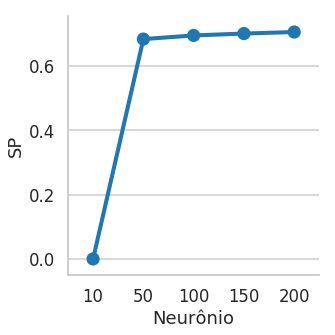

In [11]:
sns.set_style("whitegrid")
sns.set_context("talk")
data = dft.reset_index()
print data.head()
g = sns.catplot(x=u"Neuronios", y="SP", kind="point", ci="sd",
                    data=data)

for ax in g.axes.flatten()[-3:]:
    ax.set_xlabel(u"Neurônio")
if save:
    savefig(g,path_figures+'/SPXneuronXmember.png')

if save:
    savefig(g,tese_goltz+'/SPXneuronXmember.png')

# SP final of Network for each Fold

In [12]:
df_pred = {}
for ifold in range(n_folds):
    files_fold[ifold] = file_hier + '/fold0{0}'.format(ifold)
    df_pred[ifold] = pd.read_csv(files_fold[ifold] + '/predict.csv')

    pred_df = pd.concat(df_pred)

sp_folds = []
for ifold in range(n_folds):
    pred = np.argmax(pred_df.loc[ifold].values,axis=1)
    table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
    test_id = table_master[table_master['fold_{0}'.format(ifold)]==1].index.values
    true = table_master['target'].values
    sp = sp_index(y_pred=pred[test_id],y_true=true[test_id])
    sp_folds.append(sp)
        #print("SP of fold {0}:{1:.2f}".format(ifold,sp))
sp_df = pd.DataFrame({'SP':sp_folds},index=['fold {0}'.format(i)for i in range(10)]).round(2)
    
print sp_df
print("SP: {0:.2f} +- {1:.2f}".format(sp_df.mean()['SP'],sp_df.std()['SP']))
best_SP = sp_df.max()['SP']
best_fold = int(sp_df.idxmax()['SP'].split(' ')[-1])
print("best_SP: fold {} - sp {}".format(best_fold+1,best_SP))

with  open(path_figures+'/value_SP.txt', "w") as text_file:
    text_file.write("SP: {0:.2f} +- {1:.2f} \nbest_SP: fold {2} - sp {3}".format(sp_df.mean()['SP'],sp_df.std()['SP'],best_fold+1,best_SP))

with  open(tese_goltz+'/value_SP.txt', "w") as text_file:
    text_file.write("SP: {0:.2f} +- {1:.2f} \nbest_SP: fold {2} - sp {3}".format(sp_df.mean()['SP'],sp_df.std()['SP'],best_fold+1,best_SP))

          SP
fold 0  0.67
fold 1  0.68
fold 2  0.68
fold 3  0.69
fold 4  0.68
fold 5  0.69
fold 6  0.68
fold 7  0.68
fold 8  0.69
fold 9  0.69
SP: 0.68 +- 0.01
best_SP: fold 4 - sp 0.69


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/fold00/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/fold00_train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/fold01/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/fold01_train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/fold02/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a70136899

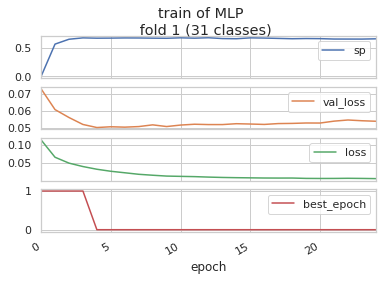

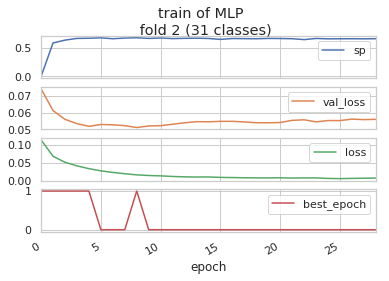

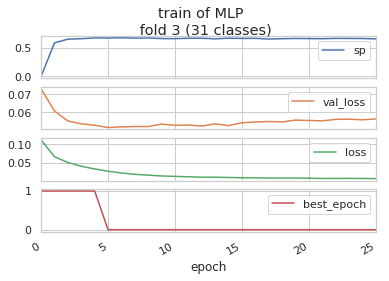

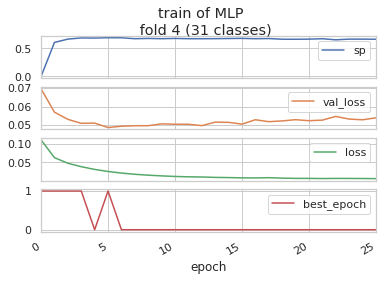

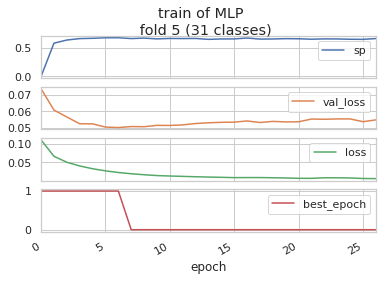

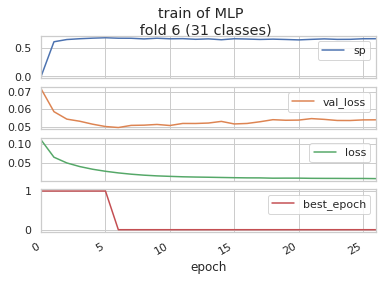

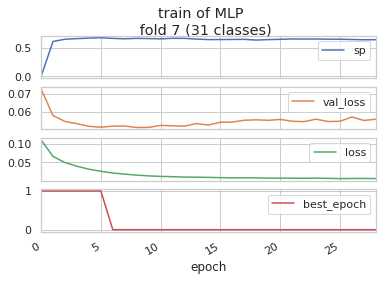

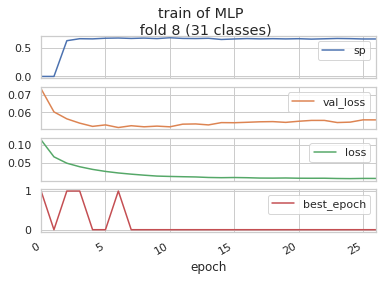

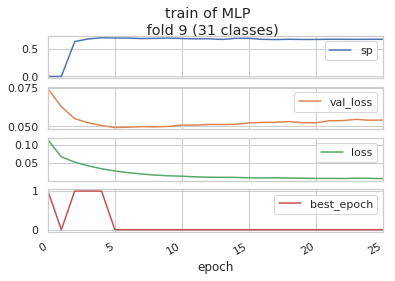

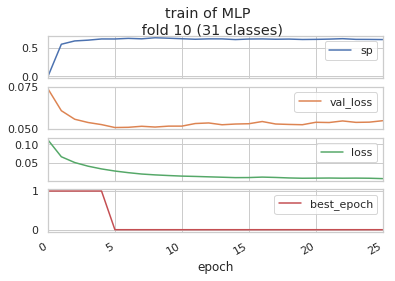

In [13]:
#train plot
import matplotlib.patches as patches
sns.set()
sns.set_style("whitegrid")
#sns.set_context("talk")

train_class = []
for ifold in range(n_folds):
    sp_folds = []
        
    df = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/log_train.csv')
    train_class.append(df)
        
        
#         fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
#         fig.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.4, hspace=0.4)
    plot = df.plot(x='epoch',y=['sp','val_loss','loss','best_epoch'],
                grid=True,#figsize=(8,5),
                subplots=True,
                title='train of MLP \n fold {0} ({1} classes)'.format(ifold+1,qtd_class))#,ax=axes)
        
        
        #fig.suptitle('train of Hierarchically committee member {0} of fold {1:02d} ({2} classes)'.format(iclass.split('_')[-1],ifold+1,qtd_class),x=1.05)
    fig = plot[0].get_figure()
        #fig.savefig("output.png")
        #savefig(plt=fig,filename=file_hier+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/train.png')
    savefig(plt=fig,filename=file_hier+'/fold0{0}'.format(ifold)+'/train.png')
    savefig(plt=fig,filename=tese_goltz+'/fold0{0}_train.png'.format(ifold))



#pd_tmp = pd.concat(train_class,names=['member']).reset_index().drop(['level_1'],axis=1)

# pd_tmp = pd.concat(train_class,axis=0,keys=class_name).reset_index().drop(['level_1'],axis=1)

# tmp_list = pd_tmp.columns.values
# tmp_list[0]='member'
# pd_tmp.columns = tmp_list

# sns.set_palette(sns.color_palette("deep", 20))

# t = pd.melt(pd_tmp,id_vars=['member','epoch'], var_name='train_params',  value_name='values')
# hue_order = t.train_params.unique()#[::-1]

# g = sns.catplot(x='epoch',y='values',col='member',hue='train_params',kind='point',data=t[(t['train_params']=='sp')],col_wrap=3,sharey=False,sharex=False,markers=' ',legend=False,height=4, aspect=2)
# g.set_xticklabels(rotation=90)
# g.set(xticks=t. [2::8])

# labels = hue_order
# colors = sns.color_palette("deep").as_hex()[:len(labels)]
# handles = [patches.Patch(color=col, label=lab) for col, lab in zip(colors, labels)]

# plt.legend(handles=handles, title='train_params',loc='center left', bbox_to_anchor=(1, 0.75))

# for ax in g.axes.flatten():
#     imember = ax.get_title().split('_')[-1]
#     ax.set_title('member {0}'.format(imember))
    

#savefig(plt=g,filename=file_hier+'/fold0{0}'.format(ifold)+'/train_sp.png')

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/fold03/MaxoutputNeuron_VP_fold3.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/MaxoutputNeuron_VP_fold3.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/fold03/violine_VP_fold3.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/violine_VP_fold3.png file


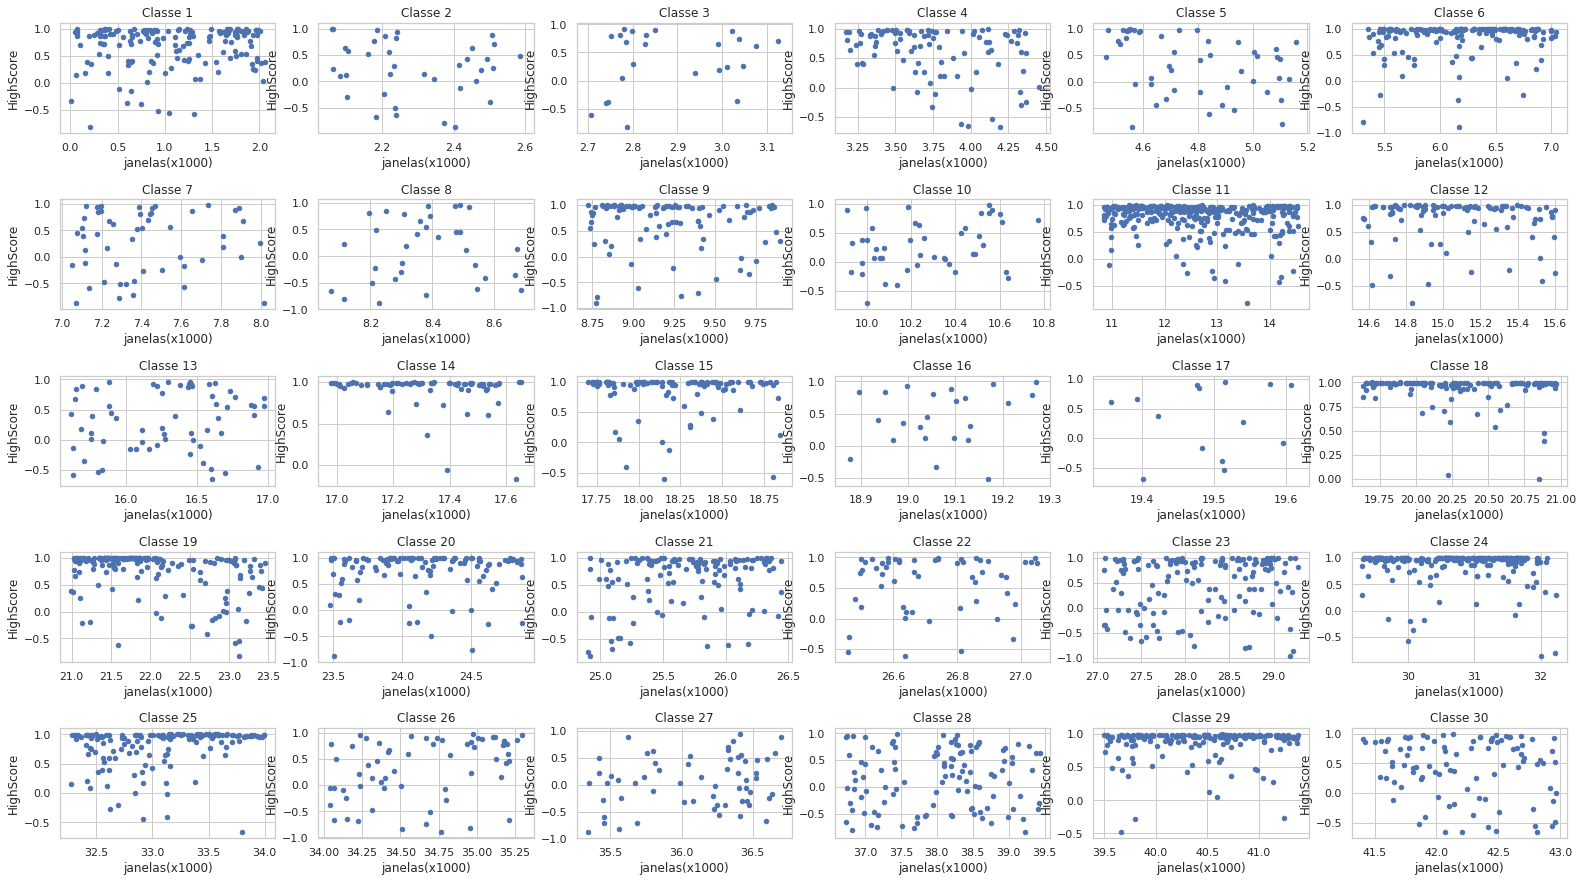

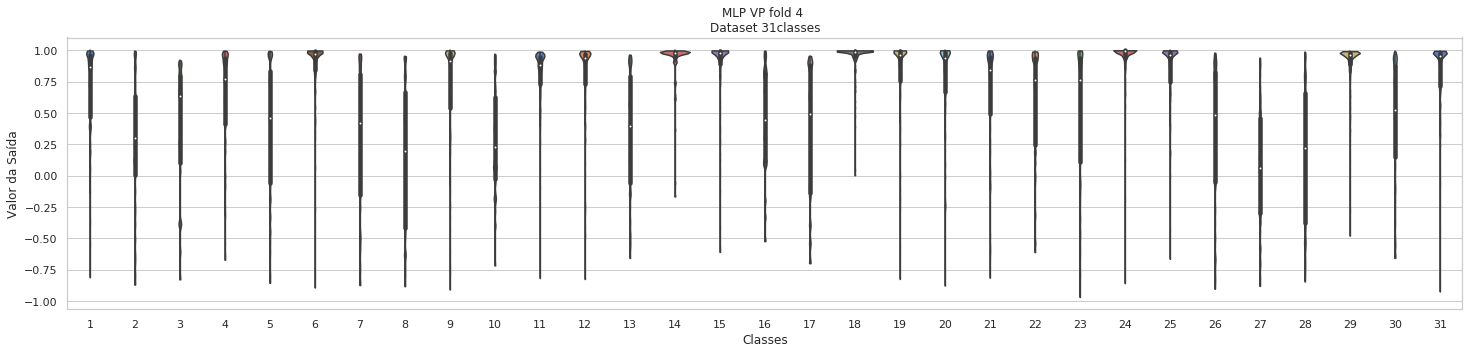

In [21]:
sns.set()
sns.set_style("whitegrid")
    
for ifold in [best_fold]:#range(n_folds):
    
    pred = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/predict.csv')
    table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
    true = table_master[(table_master['fold_{0}'.format(ifold)]==1)].index.values
    pred['predict'] = np.argmax(pred.values,axis=1)
    pred['HighScore'] = pred[pred.columns[:-1]].max(axis=1)
    
    
    pred['target'] = table_master['target']
    pred['janelas(x1000)'] = map(lambda x:float(x)/1000,pred.index)
    
    data = pred[(pred['target']==pred['predict'])]
    
#     g = sns.FacetGrid(data[data['target']<5].loc[true,['janelas','target','HighScore']], row='target',sharey=False,sharex=False,margin_titles=True)
#     g = g.map(sns.pointplot,'janelas', 'HighScore',join=False)
    
    if database=='24classes':
        fig, axes = plt.subplots(ncols=4,nrows=6,figsize=(25,15))
    
    if database=='31classes':
        fig, axes = plt.subplots(ncols=6,nrows=5,figsize=(27,15))
        
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    #ppt = sns.pointplot(x='janelas',y='HighScore',hue='target',data=data[data['target']<2].loc[true,['janelas','target','HighScore']],join=False,ax=ax)
    
    for i,iax in enumerate(axes.flatten()):
        
        data[data['target']==i].loc[true,['janelas(x1000)','target','HighScore']].plot.scatter(x='janelas(x1000)',
                           y='HighScore',ax=iax)
        
        iax.set_title('Classe {}'.format(i+1))
        
    
    if database=='24classes':
        fig2, axes2 = plt.subplots(figsize=(20,5))
    
    if database=='31classes':
        fig2, axes2 = plt.subplots(figsize=(25,5))
    
    g = sns.violinplot(x="target", y="HighScore",data=data.loc[true,['janelas','target','HighScore']],ax=axes2,palette="muted",cut=0, bw=.05)
    g.set_xticklabels(range(1,int(qtd_class)+1))
    g.set_xlabel("Classes")
    g.set_ylabel(u"Valor da Saída")
    g.set_title(u"MLP VP fold {} \nDataset {}".format(ifold+1,database))
    
    
    savefig(fig,file_hier+'/fold0{0}'.format(ifold)+'/MaxoutputNeuron_VP_fold{0}.png'.format(ifold))
    savefig(plt=fig,filename=tese_goltz+'/MaxoutputNeuron_VP_fold{0}.png'.format(ifold))    

    savefig(fig2,file_hier+'/fold0{0}'.format(ifold)+'/violine_VP_fold{0}.png'.format(ifold))
    savefig(plt=fig2,filename=tese_goltz+'/violine_VP_fold{0}.png'.format(ifold))    

# predict HierarqNet

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/confusion_matrix_sns.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/confusion_matrix_sns.png file


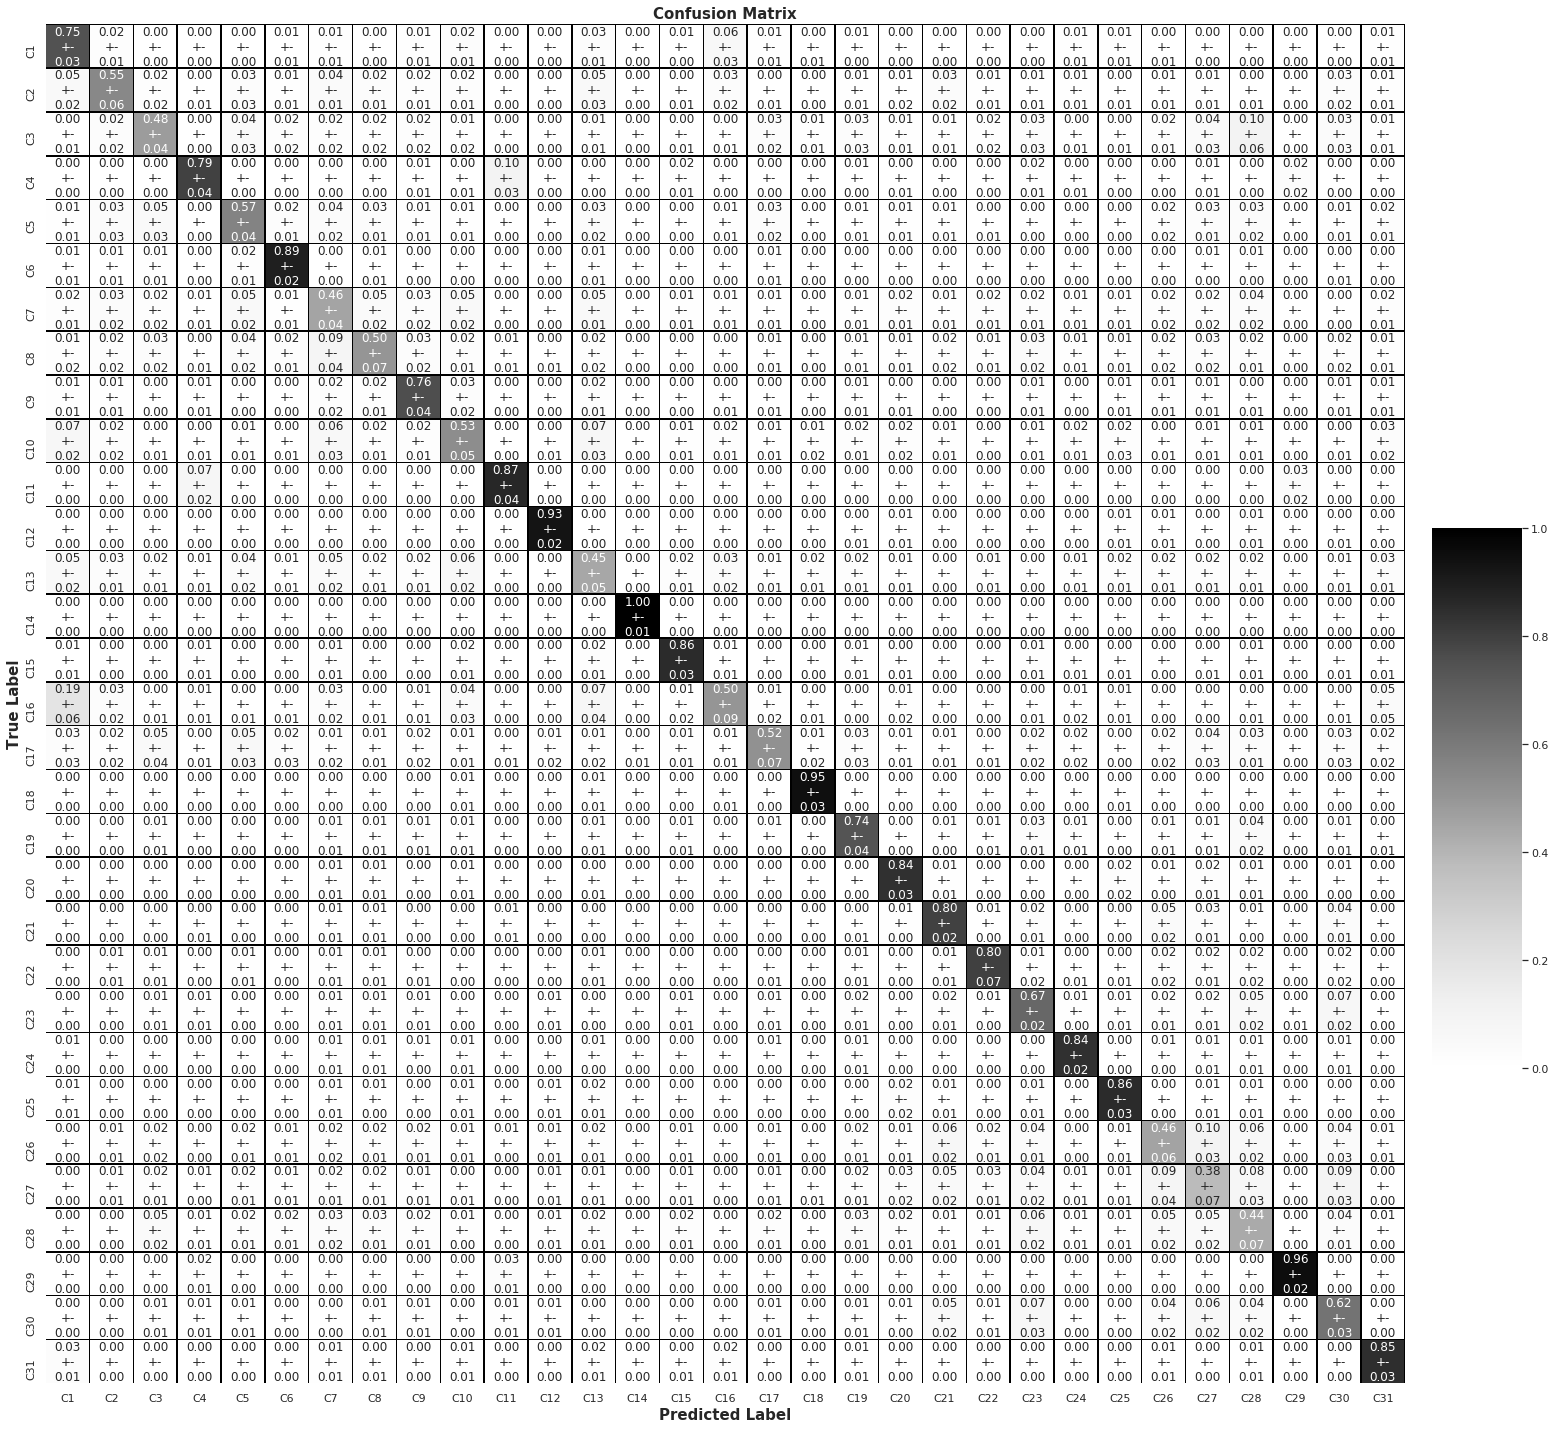

In [18]:
#fig, ax = plt.subplots(figsize=(30,30))

#plotConfusionMatrix(pred, true, class_labels=['Classe {0:02d}'.format(i+1) for i in range(24)], ax=ax)
#work with only pred_df and table_master
sns.set()
cm_folds = []
for ifold in range(n_folds):
    pred = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/predict.csv')
    table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
    
    test_id = table_master[table_master['fold_{0}'.format(ifold)]==1].index.values
    
    
    pred_out = np.argmax(pred.loc[test_id,:].values,axis=1)
    true = table_master.loc[test_id,'target'].values
    
    confusionMatrix = confusion_matrix(y_pred=pred_out,y_true=true)
    cm_norm = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
    
    cm_folds.append(cm_norm)
if database=='31classes':
    fig = plt.figure(figsize=(25,25))
else:
    fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_aspect(1)

cbar_ax = fig.add_axes([.905, .3, .05, .3])

snsConfusionMatrix(cm_norm=cm_folds,ax=ax,
                   x_labels=['C{0}'.format(i+1) for i in range(int(qtd_class))],
                   y_labels=['C{0}'.format(i+1) for i in range(int(qtd_class))],
                   sns_kwg={'cbar_ax':cbar_ax,'cbar':True})

#plt.title('Confusion matrix of HierarqNet using MLP as estimator',fontsize=20,fontweight="bold")
fig_cm = file_hier + '/confusion_matrix_sns.png'
savefig(fig,fig_cm)
savefig(plt=plt,filename=tese_goltz+'/confusion_matrix_sns.png')

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/recall_each_classes_en.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/16a213b71b263f1db6446fdcb3a89801cfdbb8a2a7013689976636f346afdc62/recall_each_classes_pt.png file


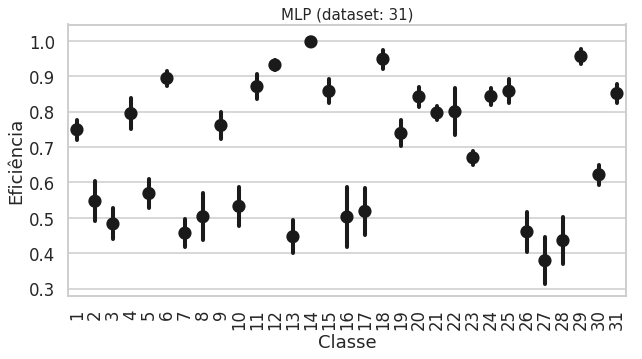

In [19]:
from sklearn.metrics import recall_score

recall_all = []
for ifold in range(n_folds):
    pred = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/predict.csv')
    table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
    
    test_id = table_master[table_master['fold_{0}'.format(ifold)]==1].index.values
    
    
    pred_test = np.argmax(pred.loc[test_id,:].values,axis=1)
    true_test = table_master.loc[test_id,'target'].values
        
    #sp = sp_index(y_pred=pred_test,y_true=true_test)
    recall = recall_score(y_pred=pred_test,y_true=true_test,average=None)
    
    [recall_all.append(i)for i in recall]


idxs = pd.MultiIndex.from_product(iterables=[map(lambda x:x+1,range(n_folds)),map(lambda x:x+1,range(len(recall)))],names=['folds','Classe'])
df_test = pd.DataFrame({u'Eficiência':recall_all},index=idxs)

sns.set_style("whitegrid")
sns.set_context("talk")

data = df_test.reset_index()#query("member=='class_B'").reset_index()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

g = sns.pointplot(x="Classe", y=u'Eficiência',markers='o', kind="line", ci="sd", data=data, color='k', markerfacecolor='g', linestyles=' ', ax=ax)

#g.grid()

for item in g.get_xticklabels():
    item.set_rotation(90)

ax.set_title(u"MLP (dataset: {})".format(database[:2]),fontsize=15)

# recall_folds = []
# for ifold in range(n_folds):
#     pred = pred_df.loc[ifold]['pred'].values
#     table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
#     test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
#     true = table_master['target'].values
#     recall = recall_score(y_pred=pred[test_id],y_true=true[test_id],average=None)
    
    
#     recall_folds.append(recall)

# recall_mean = np.asarray(recall_folds).mean(axis=0)
# recall_std = np.asarray(recall_folds).std(axis=0)

# fig, ax = plt.subplots(figsize=(10,5))

# plt.errorbar(x=['{0:02d}'.format(i+1) for i in range(24)],y=recall_mean,
#              yerr=recall_std,
#              marker='o',
#              color='k',
#              ecolor='k',
#              markerfacecolor='g',
#              capsize=0,
#              linestyle='None',label=None)
#s_fig.grid()
#s_fig.set_xticks("Classes")#,fontsize=30)
# s_fig.ylabel(u"Efficiency",fontsize=30)
# s_fig.yticks(fontsize=14)
# s_fig.xticks(fontsize=14)

# plt.legend()
savefig(plt,file_hier +'/recall_each_classes_en.png')
savefig(plt=plt,filename=tese_goltz+'/recall_each_classes_pt.png')

# Analisando o Lofagrama